In [ ]:
# @title 1. Naive Bayes Classifiers - SMS Spam Collection dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import zipfile
import os

Load the Dataset: For this example, we’ll use a CSV file that contains the SMS spam dataset. The dataset typically has two columns: label (spam or ham) and message (text content).

In [ ]:
# Define the URL of the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Step 1: Download the zip file to the local directory (optional if already downloaded)
import requests
response = requests.get(url)
with open('smsspamcollection.zip', 'wb') as f:
    f.write(response.content)

# Step 2: Extract the contents of the zip file
with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
    zip_ref.extractall('smsspamcollection')

# Step 3: Load the dataset (specifically the SMSSpamCollection file)
# The file name in the extracted folder is 'SMSSpamCollection'
file_path = os.path.join('smsspamcollection', 'SMSSpamCollection')

# Read the dataset into a DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# Check the first few rows of the dataframe
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# @title Preprocessing the Data: We'll preprocess the data by:Mapping labels to 0 and 1 for binary classification (ham = 0, spam = 1). Splitting the data into training and testing sets.


# Map labels to binary values: 'ham' -> 0, 'spam' -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and target (y)
X = df['message']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Text Vectorization: We need to convert the text data (messages) into numerical vectors so that the Naive Bayes model can process it. We’ll use CountVectorizer, which converts a collection of text documents into a matrix of token counts (bag-of-words model).
# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vect = vectorizer.fit_transform(X_train)

# Transform the test data using the already fitted vectorizer
X_test_vect = vectorizer.transform(X_test)


In [ ]:
# @title Train the Naive Bayes Model: We'll now train a Multinomial Naive Bayes classifier on the training data.
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
# @title Make Predictions: After training the model, we can make predictions on the test data.

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vect)

In [ ]:
# @title Evaluate the Model: Now, let's evaluate the model by checking the accuracy, confusion matrix, and classification report (precision, recall, f1-score).

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report (precision, recall, f1-score)
cr = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print("\nClassification Report:")
print(cr)

Accuracy: 98.83%

Confusion Matrix:
[[961   5]
 [  8 141]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



2. K-means Clustering - Iris Dataset

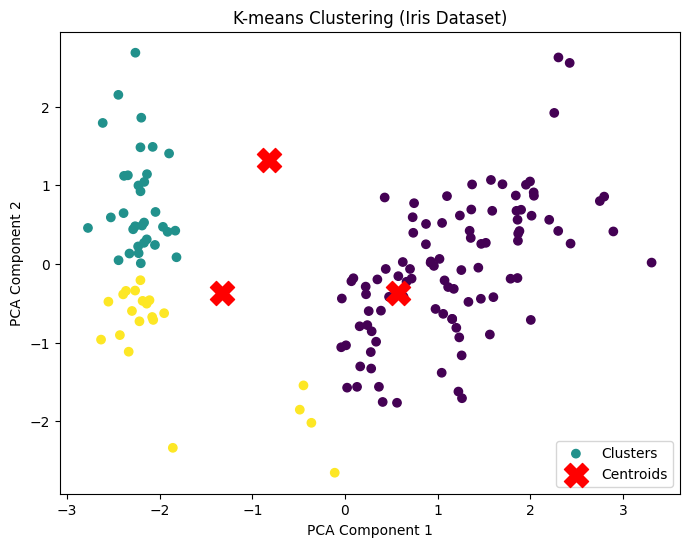

Adjusted Rand Index (ARI): 0.43


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better readability
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

# Normalize the data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

# Visualize clusters using PCA (2D plot)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', label="Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title("K-means Clustering (Iris Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Evaluate clustering performance (optional, since ground truth is available for Iris)
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(target, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")


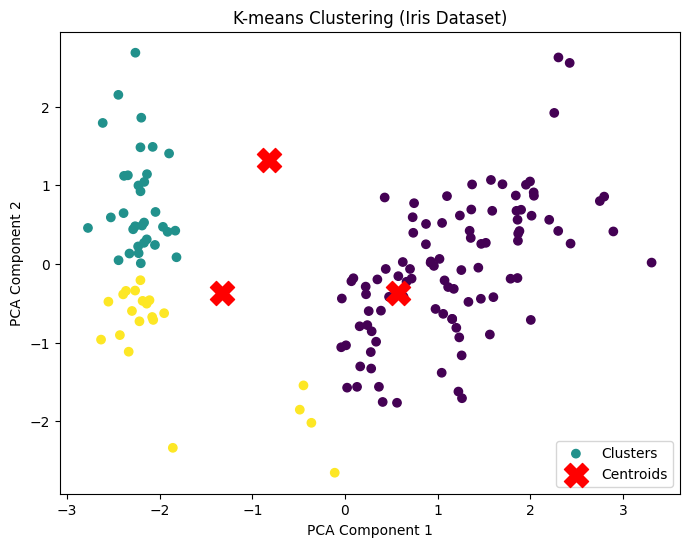

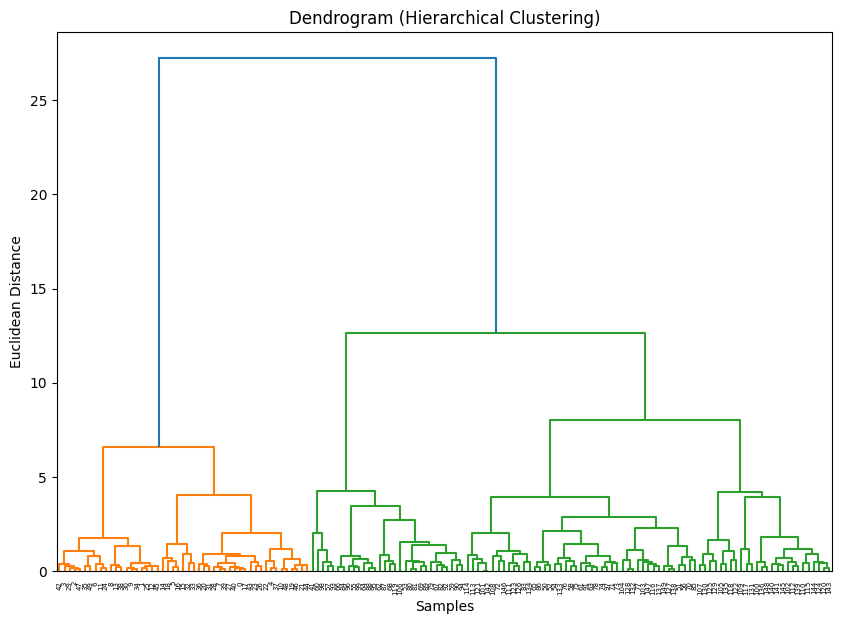

Adjusted Rand Index (ARI): 0.43


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as sch

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for better readability
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

# Normalize the data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

# Visualize K-means clusters using PCA (2D plot)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', label="Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title("K-means Clustering (Iris Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Evaluate clustering performance (optional, since ground truth is available for Iris)
ari_score = adjusted_rand_score(target, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")

 3. Hierarchical Clustering

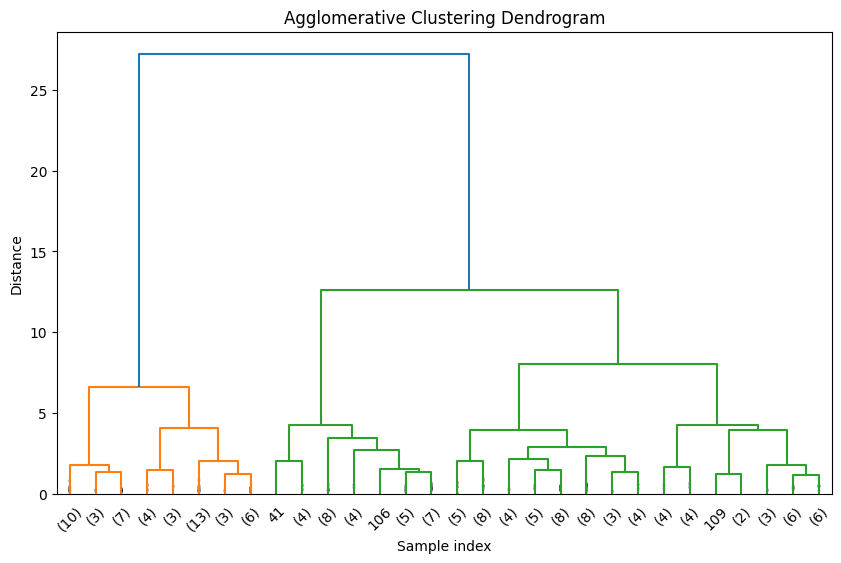

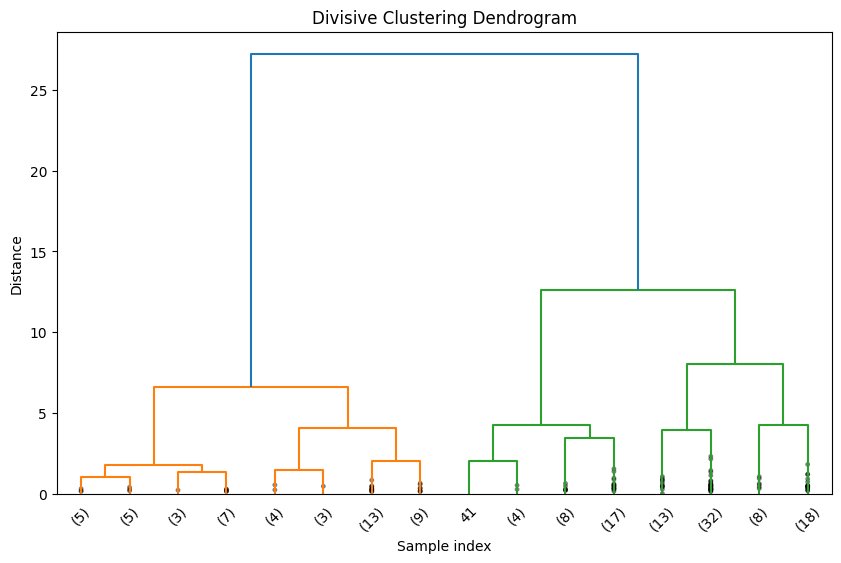

Agglomerative Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
# Hierarchical Clustering (Agglomerative Clustering and Divisive Clustering)
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Agglomerative Clustering (Bottom-Up)

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Visualize dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


# Divisive Clustering (Top-Down)

plt.figure(figsize=(10, 6))
Z_div = linkage(X_scaled, method='ward')  # Same linkage used
dendrogram(Z_div, truncate_mode="level", p=3, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title("Divisive Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Display labels from agglomerative clustering
print(f"Agglomerative Clustering Labels:\n{agglo_labels}")